# Multithermal-multibaric simulations of liquid TIP4P/Ice water

### We aim at studying liquid TIP4P/Ice water in the temperature interval 260-350 K and pressure interval 0-300 MPa using only one multithermal-multibaric simulation. We would like to obtain the density as a function of temperature and pressure and we are also interested in understanding the effect of temperature and pressure in the structure of liquid water.

#### Simulation reported in *Multithermal-multibaric molecular simulations from a variational principle*, PM Piaggi, M Parrinello, Physical Review Letters **122** (5), 050601

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
###################################################################
# Plot options
###################################################################

font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif', 
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (15,7)

###################################################################
# Colors
###################################################################
# Palette 1
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
MarkerSize=20
palette=tableau20

import matplotlib
matplotlib.colors.ColorConverter.colors['palette1'] = palette[0]
matplotlib.colors.ColorConverter.colors['palette2'] = palette[2]
matplotlib.colors.ColorConverter.colors['palette3'] = palette[4]
matplotlib.colors.ColorConverter.colors['palette4'] = palette[6]
matplotlib.colors.ColorConverter.colors['palette5'] = palette[8]
matplotlib.colors.ColorConverter.colors['palette6'] = palette[10]
matplotlib.colors.ColorConverter.colors['palette7'] = palette[12]
matplotlib.colors.ColorConverter.colors['palette8'] = palette[14]
matplotlib.colors.ColorConverter.colors['palette9'] = palette[16]
matplotlib.colors.ColorConverter.colors['palette10'] = palette[18]

paletteNames=['palette1','palette2','palette3','palette4',
              'palette5','palette6','palette7','palette8',
              'palette9','palette10']

###################################################################
# Fessa palette
###################################################################

def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    rgb=tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))
    return tuple([x/255. for x in rgb])

from matplotlib.colors import LinearSegmentedColormap

paletteFessa = [
          hex_to_rgb("#1F3B73"),
          hex_to_rgb("#2F9294"),
          hex_to_rgb("#50B28D"),
          hex_to_rgb("#A7D655"),
          hex_to_rgb("#FFE03E"),
          hex_to_rgb("#FFA955"),
          hex_to_rgb("#D6573B")
         ]

cm_fessa = LinearSegmentedColormap.from_list("fessa", paletteFessa, N=1000)

###################################################################
# Other palettes
###################################################################

cm_blue = LinearSegmentedColormap.from_list("my_blue", [palette[0],palette[0]], N=1000)
cm_blue2 = LinearSegmentedColormap.from_list("my_blue2", [palette[0],hex_to_rgb("#FFFFFF")], N=1000)
cm_orange = LinearSegmentedColormap.from_list("my_orange", [palette[2],palette[2]], N=1000)
cm_orange2 = LinearSegmentedColormap.from_list("my_orange2", [palette[2],hex_to_rgb("#FFFFFF")], N=1000)

## Density as a function of temperature
We study the density anomaly. The continuous lines in the next plot are calculated from the multithermal-multibaric simulation. References calculated in the isothermal-isobaric ensemble are shown in circles.

In [4]:
#Last values
volRef1bar=np.genfromtxt("References/1bar/resultsVolume.txt")
volRef300MPa=np.genfromtxt("References/300MPa/resultsVolume-BA.txt")

In [5]:
# Volume vs temperature
vol300MPa=np.genfromtxt("MultithermalMultibaric/Analysis/Reweight-300MPa/resultsVolume.txt")
vol200MPa=np.genfromtxt("MultithermalMultibaric/Analysis/Reweight-200MPa/resultsVolume.txt")
vol100MPa=np.genfromtxt("MultithermalMultibaric/Analysis/Reweight-100MPa/resultsVolume.txt")
vol50MPa=np.genfromtxt("MultithermalMultibaric/Analysis/Reweight-50MPa/resultsVolume.txt")
vol1bar=np.genfromtxt("MultithermalMultibaric/Analysis/Reweight-1bar/resultsVolume.txt")

/local-1/piaggp/Programs/miniconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


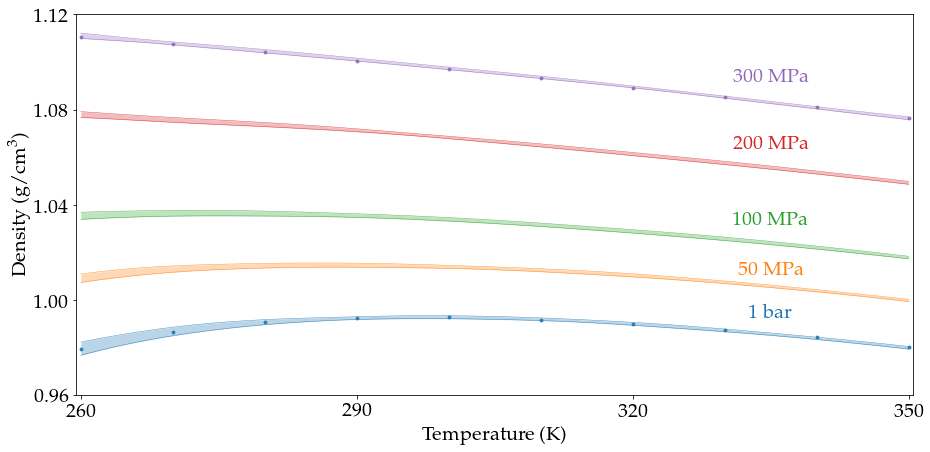

In [6]:
fig, ax1 = plt.subplots()

vol2density=256*18.01528/602.214086

ax1.scatter(volRef1bar[:,0],vol2density/volRef1bar[:,1],alpha=0.9,color=palette[0], s=8)
ax1.scatter(volRef300MPa[:,0],vol2density/volRef300MPa[:,1],alpha=0.9,color=palette[8], s=8)
errorFactor=1.

ax1.plot(vol1bar[:,0],vol2density/(vol1bar[:,1]-errorFactor*vol1bar[:,2]),linewidth=0.5,alpha=0.8,color=palette[0])
ax1.plot(vol1bar[:,0],vol2density/(vol1bar[:,1]+errorFactor*vol1bar[:,2]),linewidth=0.5,alpha=0.8,color=palette[0])
ax1.fill_between(vol1bar[:,0],vol2density/(vol1bar[:,1]-errorFactor*vol1bar[:,2]),vol2density/(vol1bar[:,1]+errorFactor*vol1bar[:,2]),linewidth=0.,alpha=0.3,color=palette[0])

ax1.plot(vol50MPa[:,0],vol2density/(vol50MPa[:,1]-errorFactor*vol50MPa[:,2]),linewidth=0.5,alpha=0.8,color=palette[2])
ax1.plot(vol50MPa[:,0],vol2density/(vol50MPa[:,1]+errorFactor*vol50MPa[:,2]),linewidth=0.5,alpha=0.8,color=palette[2])
ax1.fill_between(vol50MPa[:,0],vol2density/(vol50MPa[:,1]-errorFactor*vol50MPa[:,2]),vol2density/(vol50MPa[:,1]+errorFactor*vol50MPa[:,2]),linewidth=0.,alpha=0.3,color=palette[2])

ax1.plot(vol100MPa[:,0],vol2density/(vol100MPa[:,1]-errorFactor*vol100MPa[:,2]),linewidth=0.5,alpha=0.8,color=palette[4])
ax1.plot(vol100MPa[:,0],vol2density/(vol100MPa[:,1]+errorFactor*vol100MPa[:,2]),linewidth=0.5,alpha=0.8,color=palette[4])
ax1.fill_between(vol100MPa[:,0],vol2density/(vol100MPa[:,1]-errorFactor*vol100MPa[:,2]),vol2density/(vol100MPa[:,1]+errorFactor*vol100MPa[:,2]),linewidth=0.,alpha=0.3,color=palette[4])

ax1.plot(vol200MPa[:,0],vol2density/(vol200MPa[:,1]-errorFactor*vol200MPa[:,2]),linewidth=0.5,alpha=0.8,color=palette[6])
ax1.plot(vol200MPa[:,0],vol2density/(vol200MPa[:,1]+errorFactor*vol200MPa[:,2]),linewidth=0.5,alpha=0.8,color=palette[6])
ax1.fill_between(vol200MPa[:,0],vol2density/(vol200MPa[:,1]-errorFactor*vol200MPa[:,2]),vol2density/(vol200MPa[:,1]+errorFactor*vol200MPa[:,2]),linewidth=0.,alpha=0.3,color=palette[6])

ax1.plot(vol300MPa[:,0],vol2density/(vol300MPa[:,1]-errorFactor*vol300MPa[:,2]),linewidth=0.5,alpha=0.8,color=palette[8])
ax1.plot(vol300MPa[:,0],vol2density/(vol300MPa[:,1]+errorFactor*vol300MPa[:,2]),linewidth=0.5,alpha=0.8,color=palette[8])
ax1.fill_between(vol300MPa[:,0],vol2density/(vol300MPa[:,1]-errorFactor*vol300MPa[:,2]),vol2density/(vol300MPa[:,1]+errorFactor*vol300MPa[:,2]),linewidth=0.,alpha=0.3,color=palette[8])

ax1.set_ylim([0.96,1.12])
ax1.set_xlim([259.5,350.5])
ax1.set_xticks([260,290,320,350])
ax1.set_yticks(np.arange(0.96,1.12,0.04))
ax1.set_xticklabels(['260','290','320','350'])
ax1.set_xlabel("Temperature (K)")
ax1.set_ylabel(r"Density (g/cm$^3$)")

ax1.text(335,0.995,"1 bar",color=palette[0],va='center',ha='center')
ax1.text(335,1.013,"50 MPa",color=palette[2],va='center',ha='center')
ax1.text(335,1.034,"100 MPa",color=palette[4],va='center',ha='center')
ax1.text(335,1.066,"200 MPa",color=palette[6],va='center',ha='center')
ax1.text(335,1.094,"300 MPa",color=palette[8],va='center',ha='center')


plt.show()

## Density as a function of temperature and pressure
The multithermal multibaric simulations provies continuous results in the temperature-pressure interval. We exploit this to plot the density as a function of temperature and pressure. We find the temperature of maximum density for different pressures. The limit of stability of the liquid phase is also shown. In the shaded region ice Ih is the most stable phase.

In [7]:
volTP=np.genfromtxt("MultithermalMultibaric/Analysis/Reweight-TP/resultsVolume.txt")

In [8]:
# TIP4P ice liquid - Ih coexistence
# from THE JOURNAL OF CHEMICAL PHYSICS 122, 234511 (2005)
# A potential model for the study of ices and amorphous water: TIP4P/Ice
# J. L. F. Abascal, E. Sanz, R. García Fernández, and C. Vega

tempRef=np.array([232.63063115361803 ,
233.83695039968603 ,
235.04336064293125 ,
236.249588891822   ,
237.45590813789    ,
238.6621970515656  ,
239.86836463567153 ,
241.07444122260029 ,
242.28060880670625 ,
243.48665506124257 ,
244.5923496287361  ,
249.11495180212512 ,
250.32084639469946 ,
251.52698364641293 ,
252.73293890377204 ,
253.93895482591597 ,
255.1450010804523  ,
256.3509866702038  ,
257.55669926842364 ,
258.76238153425106 ,
259.9679424705089  ,
261.0730667890251  ,
262.17802124614394 ,
263.3832181936928  ,
264.3876753682853  ,
265.3920112133081  ,
266.49689893916354 ,
267.5011437870092  ,
268.50542503372566 ,
269.509415089475   ,
270.2124956795796  ,
271.11580645844816 ,
272.2 ])
    
    
pressRef=np.array([291.41748417845645,
284.9763399858231,
278.9545107858386,
272.0940516005562,
265.65290740792284,
259.0719915510731,
251.93198903735822,
244.3726715309947,
237.23266901727993,
229.53357984670015,
223.1772692891534,
193.97722148857042,
185.57927399690925,
178.29949981897835,
170.18109565574946,
162.3422348209533,
154.64314565037353,
146.664513151361,
137.42793567440208,
128.05158653322678,
118.11615073518647,
109.1321328903739,
99.36539372595007,
87.75269795731447,
78.65783341768588,
69.00388222119227,
58.9296453954928,
48.85637920635031,
38.9508390142671,
27.703490845708075,
21.15538250448685,
9.741278975425303,
0.1])

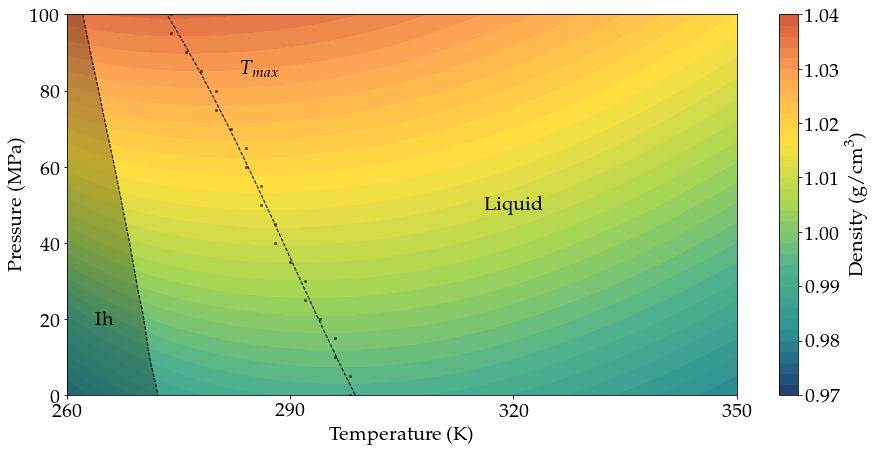

In [21]:
plt.figure()


x=volTP[:,0]
y=volTP[:,1]
z=volTP[:,2]
z=np.reshape(z,[46,21])
x=np.linspace(np.amin(x),np.amax(x),46)
y=np.linspace(np.amin(y),np.amax(y),21)

X,Y=np.meshgrid(x,y,indexing='ij')

plt.contourf(X,Y,vol2density/z,np.arange(0.97,1.0400,0.002),cmap=cm_fessa,vmin=0.97,vmax=1.04)
cbar = plt.colorbar(ticks=np.arange(0.97,1.05,0.01))

cbar.set_label(r'Density (g/cm$^3$)')
plt.xlim([260,350])
plt.ylim([0,100])

posmin=np.argmin(z,axis=0)

from scipy.interpolate import interp1d, BSpline, splev, splrep
f = splrep(y,x[posmin],s=10)

y2=np.linspace(np.amin(y),np.amax(y),100)

plt.plot(splev(y2,f),y2,'--',color='black',linewidth=1.)
plt.scatter(x[posmin],y,color='black',alpha=0.6,s=10,linewidths=0.)

plt.plot(tempRef,pressRef,'--',color='black',linewidth=1.)
plt.fill_between(tempRef,0,pressRef,color='black',alpha=0.25,linewidth=0.)

plt.text(265,20,"Ih",va='center',ha='center')
plt.text(320,50,"Liquid",va='center',ha='center')
plt.text(286,85,"$T_{max}$",va='center',ha='center')

plt.xlabel("Temperature (K)")
plt.ylabel("Pressure (MPa)")

plt.xticks([260,290,320,350])

plt.show()

## Radial distribution function
We calculate the radial distribution function at different temperature and pressure from the multithermal-multibaric simulation and we compare the results with references calculated in the isothermal-isobaric ensemble. 

In [10]:
# g(r)
gofr=np.genfromtxt("MultithermalMultibaric/Analysis/Reweight-Gofr/gofr.txt")
print(gofr.shape)
r = gofr[:129,0]
gofr = gofr[:,1].reshape(30001,129)

(3870129, 2)


In [11]:
# Colvar
# time energy vol b1.bias b1.force2	time2 energy2 time3 tb.mean
#  0     1     2     3       4        5      6      7      8
COLVAR=np.genfromtxt("MultithermalMultibaric/Analysis/Reweight-Gofr/COLVARtrim")

In [12]:
#References
gofr260K1bar=np.genfromtxt("References/1bar/260K/Production/Gofr/gofr.txt")
gofr300K1bar=np.genfromtxt("References/1bar/300K/Production/Gofr/gofr.txt")
gofr350K1bar=np.genfromtxt("References/1bar/350K/Production/Gofr/gofr.txt")
gofr260K300MPa=np.genfromtxt("References/300MPa/260K/Production/Gofr/gofr.txt")
gofr300K300MPa=np.genfromtxt("References/300MPa/300K/Production/Gofr/gofr.txt")
gofr350K300MPa=np.genfromtxt("References/300MPa/350K/Production/Gofr/gofr.txt")

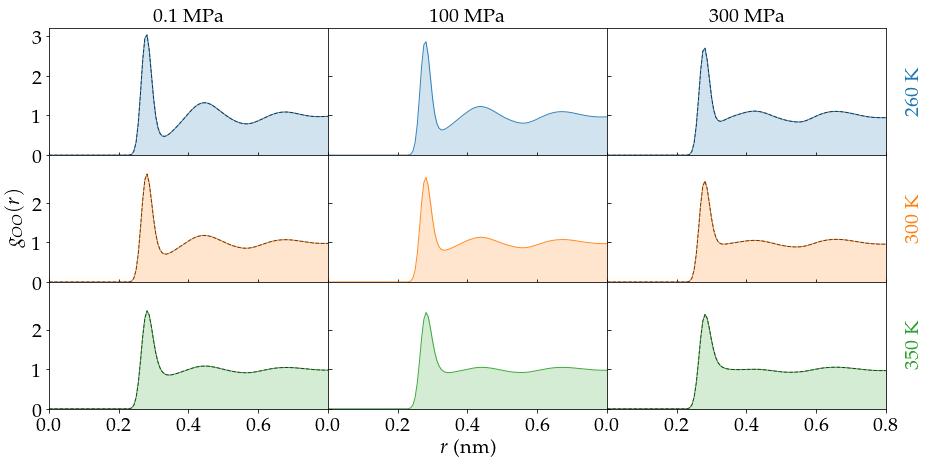

In [13]:
N=3
M=3
fig, axs = plt.subplots(nrows=N, ncols=M)
fig.subplots_adjust(wspace=0.0,hspace=0.0)

beta = 1./(0.0083144621*300)
press=0.06022140857
counter = 0
counterx = 0
for temp in np.array([260,300,350]):
    for pressi in np.array([0.1,100,300]):
        betaPrime = 1./(0.0083144621*temp)
        pressPrime=pressi*0.6022140857
        weights=beta*COLVAR[100000:300001:10,3] + (beta-betaPrime)*COLVAR[100000:300001:10,6] + (beta*press-betaPrime*pressPrime)*COLVAR[100000:300001:10,2]
        weights -= np.mean(weights)
        weights=np.exp(weights)
        ax = axs.reshape(-1)[counter]
        ax.plot(r,np.ma.average(gofr[10000:30001:1],axis=0,weights=weights),linewidth=1.,alpha=0.9,color=palette[2*counterx])
        ax.fill_between(r,0,np.ma.average(gofr[10000:30001:1],axis=0,weights=weights),linewidth=0.,alpha=0.2,color=palette[2*counterx])
        ax.set_xlim([0,0.8])
        ax.set_ylim([0,3.2])
        counter += 1
    counterx += 1


ax = axs[0,0]
ax.plot(gofr260K1bar[:,0],gofr260K1bar[:,1],"--",linewidth=1.,alpha=0.6,color='black')
ax = axs[1,0]
ax.plot(gofr300K1bar[:,0],gofr300K1bar[:,1],"--",linewidth=1.,alpha=0.6,color='black')
ax = axs[2,0]
ax.plot(gofr350K1bar[:,0],gofr350K1bar[:,1],"--",linewidth=1.,alpha=0.6,color='black')

ax = axs[0,2]
ax.plot(gofr260K300MPa[:,0],gofr260K300MPa[:,1],"--",linewidth=1.,alpha=0.6,color='black')
ax = axs[1,2]
ax.plot(gofr300K300MPa[:,0],gofr300K300MPa[:,1],"--",linewidth=1.,alpha=0.6,color='black')
ax = axs[2,2]
ax.plot(gofr350K300MPa[:,0],gofr350K300MPa[:,1],"--",linewidth=1.,alpha=0.6,color='black')

for i in range(0,2,1):
    for j in range(0,3,1):
        ax = axs[i,j]
        ax.set_xticklabels([])
        ax.tick_params(axis='x',direction='in')
        
for i in range(0,3,1):
    for j in range(1,3,1):
        ax = axs[i,j]
        ax.set_yticklabels([])
        ax.tick_params(axis='y',direction='in')
        
for i in range(0,3,1):
    for j in range(0,3,1):
        ax = axs[i,j]
        ax.set_yticks([0,1,2])

ax = axs[1,0]
ax.set_ylabel(r'$g_{OO}(r)$')
ax = axs[2,1]
ax.set_xlabel(r'$r$ (nm)')
ax = axs[0,0]
ax.set_yticks([0,1,2,3])

ax = axs[2,0]
ax.set_xticks([0.0,0.2,0.4,0.6])
ax = axs[2,1]
ax.set_xticks([0.0,0.2,0.4,0.6])
ax = axs[2,2]
ax.set_xticks([0.0,0.2,0.4,0.6,0.8])

ax = axs[0,0]
ax.text(0.4,3.5,'0.1 MPa',va='center',ha='center')
ax = axs[0,1]
ax.text(0.4,3.5,'100 MPa',va='center',ha='center')
ax = axs[0,2]
ax.text(0.4,3.5,'300 MPa',va='center',ha='center')

ax = axs[0,2]
ax.text(0.875,1.6,'260 K',va='center',ha='center',rotation=90,color=palette[0])
ax = axs[1,2]
ax.text(0.875,1.6,'300 K',va='center',ha='center',rotation=90,color=palette[2])
ax = axs[2,2]
ax.text(0.875,1.6,'350 K',va='center',ha='center',rotation=90,color=palette[4])

        
plt.show()

## Tetrahedral order parameter
We calculated the tetrahedral order parameter [J. R. Errington and P. G. Debenedetti, Nature 409, 318
(2001)] in order to analyze the changes in the structure of water as a function of temperature and pressure.

In [14]:
tetraTP=np.genfromtxt("MultithermalMultibaric/Analysis/Reweight-Tetra/results.txt")

/local-1/piaggp/Programs/miniconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


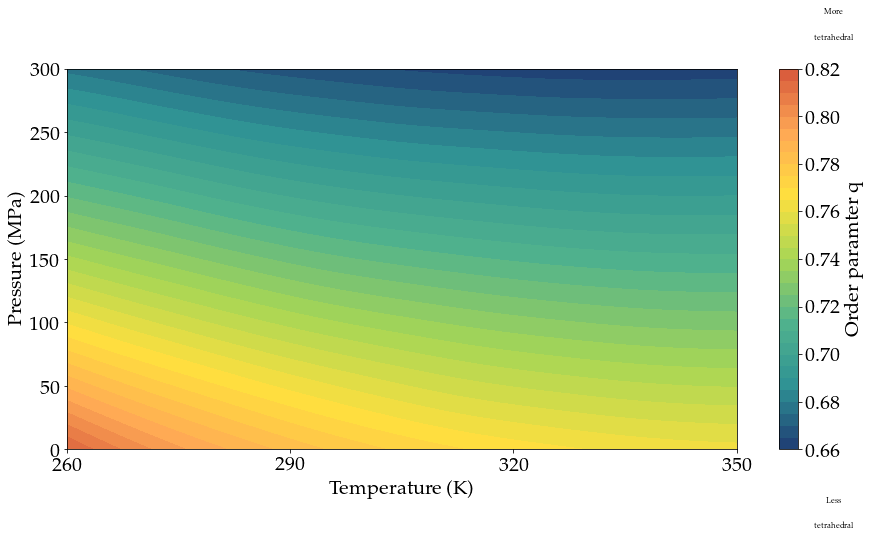

In [15]:
plt.figure()


x=tetraTP[:,0]
y=tetraTP[:,1]
z=tetraTP[:,2]
z=np.reshape(z,[46,16])
x=np.linspace(np.amin(x),np.amax(x),46)
y=np.linspace(np.amin(y),np.amax(y),16)

X,Y=np.meshgrid(x,y,indexing='ij')

plt.contourf(X,Y,z,np.arange(0.66,0.8205,0.005),cmap=cm_fessa,vmin=0.66,vmax=0.82)
cbar = plt.colorbar(ticks=np.arange(0.66,0.84,0.02))
cbar.set_label(r'Order paramter q')

plt.xlabel("Temperature (K)")
plt.ylabel("Pressure (MPa)")

plt.xticks([260,290,320,350])

plt.xlim([260,350])
plt.ylim([0,300])

plt.text(363,345,"More",va='center',ha='center',fontsize=8)
plt.text(363,325,"tetrahedral",va='center',ha='center',fontsize=8)
plt.text(363,-40,"Less",va='center',ha='center',fontsize=8)
plt.text(363,-60,"tetrahedral",va='center',ha='center',fontsize=8)

plt.show()

## Sampled regions in the multithermal-multibaric ensemble and in the isothermal-isobaric ensembles at different T and P

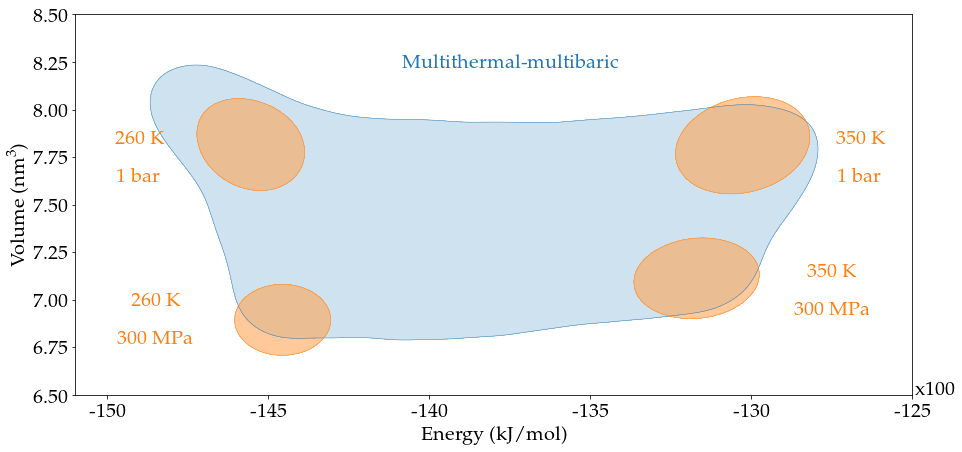

In [16]:
fig = plt.figure()

epsilon=3

boltzmann=0.0083144621
def beta(temp):
    return 1./(boltzmann*temp)

data=np.genfromtxt("MultithermalMultibaric/Analysis/SampledDistribution/fes")
x=data[:,0]
y=data[:,1]
z=data[:,2]
z=np.reshape(z,[251,251])
z -= np.amin(z)
z *= beta(300)*z
x=np.linspace(np.amin(x),np.amax(x),251)
y=np.linspace(np.amin(y),np.amax(y),251)
X,Y=np.meshgrid(x,y)
plt.contourf(X,Y,z,np.array([0,epsilon]),alpha=0.3,cmap=cm_blue2,vmin=0,vmax=5)
plt.contour(X,Y,z,np.array([0,epsilon]),alpha=0.9,cmap=cm_blue,vmin=0,vmax=5,linewidths=0.5)

data=np.genfromtxt("References/1bar/260K/Production/SampledDistribution/fes")
x=data[:,0]
y=data[:,1]
z=data[:,2]
z=np.reshape(z,[251,251])
z -= np.amin(z)
z *= beta(260)*z
x=np.linspace(np.amin(x),np.amax(x),251)
y=np.linspace(np.amin(y),np.amax(y),251)
X,Y=np.meshgrid(x,y)
plt.contourf(X,Y,z,np.array([0,epsilon]),alpha=0.6,cmap=cm_orange2,vmin=0,vmax=5)
plt.contour(X,Y,z,np.array([0,epsilon]),alpha=0.9,cmap=cm_orange,vmin=0,vmax=5,linewidths=0.5)

data=np.genfromtxt("References/1bar/350K/Production/SampledDistribution/fes")
x=data[:,0]
y=data[:,1]
z=data[:,2]
z=np.reshape(z,[251,251])
z -= np.amin(z)
z *= beta(350)*z
x=np.linspace(np.amin(x),np.amax(x),251)
y=np.linspace(np.amin(y),np.amax(y),251)
X,Y=np.meshgrid(x,y) #,indexing='ij')
plt.contourf(X,Y,z,np.array([0,epsilon]),alpha=0.6,cmap=cm_orange2,vmin=0,vmax=5)
plt.contour(X,Y,z,np.array([0,epsilon]),alpha=0.9,cmap=cm_orange,vmin=0,vmax=5,linewidths=0.5)

data=np.genfromtxt("References/300MPa/260K/Production/SampledDistribution/fes")
x=data[:,0]
y=data[:,1]
z=data[:,2]
z=np.reshape(z,[251,251])
z -= np.amin(z)
z *= beta(260)*z
x=np.linspace(np.amin(x),np.amax(x),251)
y=np.linspace(np.amin(y),np.amax(y),251)
X,Y=np.meshgrid(x,y)
plt.contourf(X,Y,z,np.array([0,epsilon]),alpha=0.6,cmap=cm_orange2,vmin=0,vmax=5)
plt.contour(X,Y,z,np.array([0,epsilon]),alpha=0.9,cmap=cm_orange,vmin=0,vmax=5,linewidths=0.5)

data=np.genfromtxt("References/300MPa/350K/Production/SampledDistribution/fes")
x=data[:,0]
y=data[:,1]
z=data[:,2]
z=np.reshape(z,[251,251])
z -= np.amin(z)
z *= beta(350)*z
x=np.linspace(np.amin(x),np.amax(x),251)
y=np.linspace(np.amin(y),np.amax(y),251)
X,Y=np.meshgrid(x,y)
plt.contourf(X,Y,z,np.array([0,epsilon]),alpha=0.6,cmap=cm_orange2,vmin=0,vmax=5)
plt.contour(X,Y,z,np.array([0,epsilon]),alpha=0.9,cmap=cm_orange,vmin=0,vmax=5,linewidths=0.5)

plt.text(-13750,8.25,"Multithermal-multibaric",color=palette[0],ha='center',va='center')

plt.text(-12660,7.85,"350 K",color=palette[2],ha='center',va='center')
plt.text(-12660,7.65,"1 bar",color=palette[2],ha='center',va='center')
plt.text(-12750,7.15,"350 K",color=palette[2],ha='center',va='center')
plt.text(-12750,6.95,"300 MPa",color=palette[2],ha='center',va='center')
plt.text(-14900,7.85,"260 K",color=palette[2],ha='center',va='center')
plt.text(-14900,7.65,"1 bar",color=palette[2],ha='center',va='center')
plt.text(-14850,7.00,"260 K",color=palette[2],ha='center',va='center')
plt.text(-14850,6.80,"300 MPa",color=palette[2],ha='center',va='center')

plt.xlabel("Energy (kJ/mol)")
plt.xticks(np.arange(-15000,-12000,500),np.arange(-150,-120,5))
plt.ylabel(r"Volume (nm$^3$)")
plt.xlim([-15100,-12500])
plt.text(-12490,6.5,"x100")

plt.show()